In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
%matplotlib inline 

import datetime as dt
fromtimestamp = dt.datetime.fromtimestamp

In [2]:
data = pd.read_csv('../Data/Datasets/googletopics_weekid_v3.csv')

In [8]:
data = data.sort_values('week_id').reset_index(drop = True).drop('Unnamed: 0', axis = 1)
data.head()

,rel_val,topic,week_dt,year,month,week_of_year,week_id
0,1.0,fcrisis,2008-01-06,2008,1,1,2008-1
1,3.0,fcrisis,2008-03-09,2008,3,10,2008-10
2,5.0,fcrisis,2008-03-16,2008,3,11,2008-11
3,5.0,fcrisis,2008-03-23,2008,3,12,2008-12
4,4.0,fcrisis,2008-03-30,2008,3,13,2008-13


In [11]:
ufos = pd.read_csv('../Data/Datasets/cleandate_weekly_reval.csv')
ufos['startdateweek'] = pd.to_datetime(ufos['startdateweek'])
ufos = (ufos.sort_values('startdateweek')
            .reset_index(drop = True)
            .drop('Unnamed: 0', axis = 1))

#ufos = ufos.assign( year = ufos['week_id']
ufos

,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id
0,2006-01-08,3,0.638298,2006,1,1,2006-1
1,2006-01-15,8,1.702128,2006,1,2,2006-2
2,2006-01-22,6,1.276596,2006,1,3,2006-3
3,2006-01-29,8,1.702128,2006,1,4,2006-4
4,2006-02-05,2,0.425532,2006,2,5,2006-5
...,...,...,...,...,...,...,...
761,2020-08-09,154,32.765957,2020,8,32,2020-32
762,2020-08-16,190,40.425532,2020,8,33,2020-33
763,2020-08-23,147,31.276596,2020,8,34,2020-34
764,2020-08-30,107,22.765957,2020,8,35,2020-35


#### Plotting Corona and Ufos

In [12]:
corona = data.loc[data['topic'] == 'corona'] 

In [13]:
combined = pd.merge(ufos , corona , how = 'inner', on = 'week_id')
combined.sort_values('week_id')

,startdateweek,weekly_ufocount,rel_val_alltime,year_x,month_x,weeknum,week_id,rel_val,topic,week_dt,year_y,month_y,week_of_year
0,2019-09-01,85,18.085106,2019,9,35,2019-35,0.5,corona,2019-09-01,2019,9,35
1,2019-09-08,71,15.106383,2019,9,36,2019-36,0.5,corona,2019-09-08,2019,9,36
2,2019-09-15,101,21.489362,2019,9,37,2019-37,0.5,corona,2019-09-15,2019,9,37
3,2019-09-22,143,30.425532,2019,9,38,2019-38,0.5,corona,2019-09-22,2019,9,38
4,2019-09-29,157,33.404255,2019,9,39,2019-39,0.5,corona,2019-09-29,2019,9,39
5,2019-10-06,151,32.127660,2019,10,40,2019-40,0.5,corona,2019-10-06,2019,10,40
6,2019-10-13,164,34.893617,2019,10,41,2019-41,0.5,corona,2019-10-13,2019,10,41
7,2019-10-20,111,23.617021,2019,10,42,2019-42,0.5,corona,2019-10-20,2019,10,42
8,2019-10-27,113,24.042553,2019,10,43,2019-43,0.5,corona,2019-10-27,2019,10,43
9,2019-11-03,93,19.787234,2019,11,44,2019-44,0.5,corona,2019-11-03,2019,11,44


In [14]:
# adding column with relative values for ufos during corona period 
max_ufo_cor = combined['weekly_ufocount'].max()
combined = combined.assign(ufo_perc_cor = (combined['weekly_ufocount'] / max_ufo_cor)* 100 )

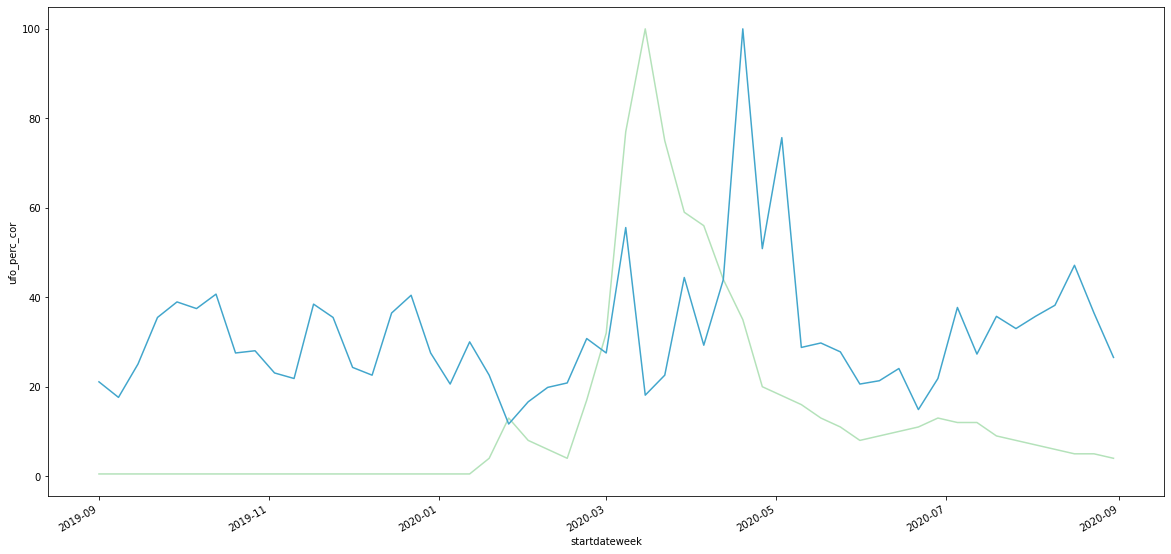

In [16]:
# plotting the ufos in blue and the corona search term values in green
fig, ax = plt.subplots ( figsize = (20, 10))
fig.autofmt_xdate()
#ax.fmt_xdata = 
palette1 = sns.set_palette('GnBu', 4)
ax1 = sns.lineplot ( x = combined['startdateweek'] , y = combined['rel_val'], color = palette1)
palette2 = sns.set_palette('GnBu', 8)
ax2 = sns.lineplot ( x = combined['startdateweek'], y= combined['ufo_perc_cor'], color = palette2)

#### Plotting financial crisis and ufos

In [17]:
fcrisis = data.loc[data['topic'] == 'fcrisis']

In [18]:
combined2 = pd.merge(ufos , fcrisis , how = 'inner', on = 'week_id')

In [19]:
# adding column with realtive values for ufos during period of fcrisis
max_ufos_fcrisis = combined2['weekly_ufocount'].max()
combined2 = combined2.assign(ufo_perc_fcrisis = (combined2['weekly_ufocount']/ max_ufos_fcrisis)* 100)

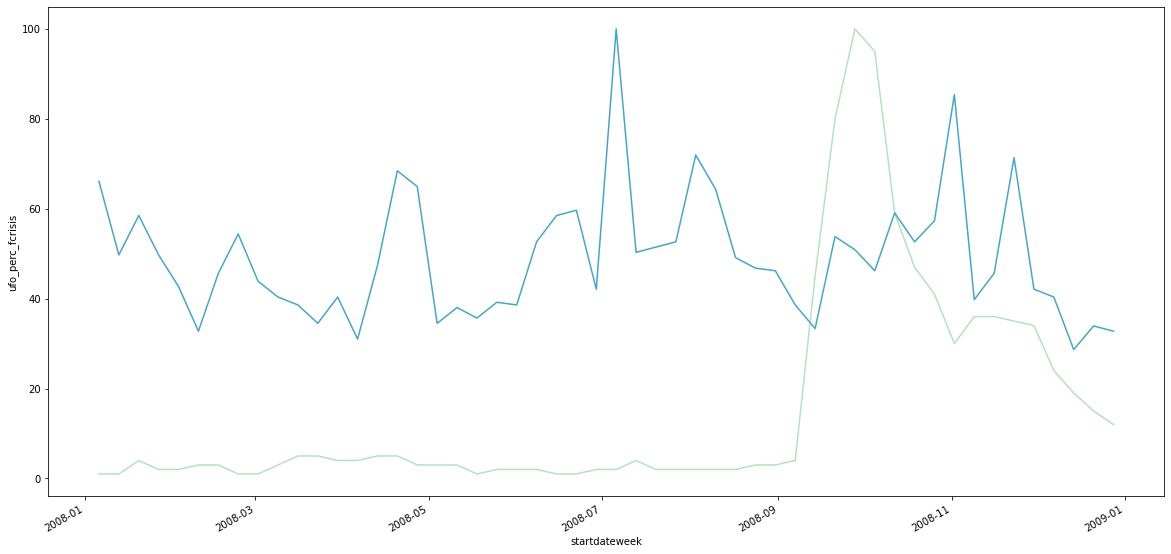

In [20]:
# plotting the ufos in blue and the fin. crisis search term values in green
fig, ax = plt.subplots ( figsize = (20, 10))
fig.autofmt_xdate()
#ax.fmt_xdata = 
ax1 = sns.lineplot ( x = combined2['startdateweek'] , y = combined2['rel_val'], color = palette1)

ax2 = sns.lineplot ( x = combined2['startdateweek'], y= combined2['ufo_perc_fcrisis'], color = palette2)

#### Plotting Boston Marathon bombings and ufos 

In [21]:
boston = data.loc[data['topic'] == 'boston']

In [22]:
combined3 = pd.merge( ufos , boston, how = 'inner', on = 'week_id')

In [23]:
# adding column with realtive values for weekly ufo count in 2013
max_ufos_boston = combined3['weekly_ufocount'].max()
combined3 = combined3.assign(ufo_perc_boston = (combined3['weekly_ufocount'] / max_ufos_boston)*100)

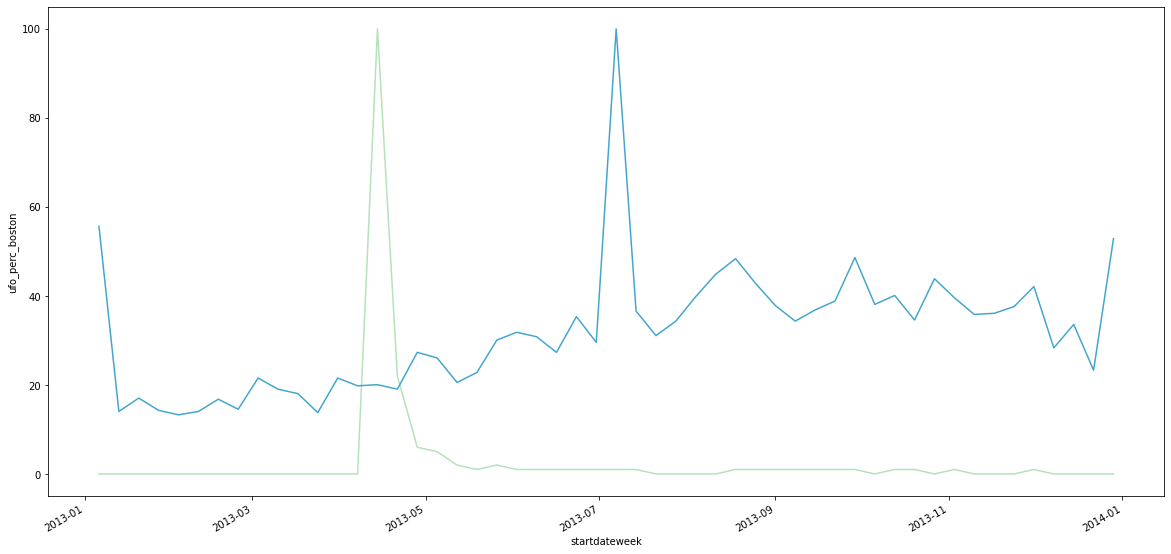

In [24]:
# plotting the ufos in blue and the boston marathon bombings data in green 
fig, ax = plt.subplots ( figsize = (20, 10))
fig.autofmt_xdate()
#ax.fmt_xdata = 
ax1 = sns.lineplot ( x = combined3['startdateweek'] , y = combined3['rel_val'], color = palette1)

ax2 = sns.lineplot ( x = combined3['startdateweek'], y= combined3['ufo_perc_boston'], color = palette2)


#### Plotting Arab Spring and ufos

In [25]:
arab = data.loc[data['topic'] == 'arab_spring']

In [26]:
combined4 = pd.merge(ufos, arab, how = 'inner', on = 'week_id')

In [27]:
#adding column with relative ufo values during arab spring
max_ufos_arab = combined4['weekly_ufocount'].max()
combined4 = combined4.assign(ufo_perc_arab= (combined4['weekly_ufocount']/ max_ufos_arab )*100 )


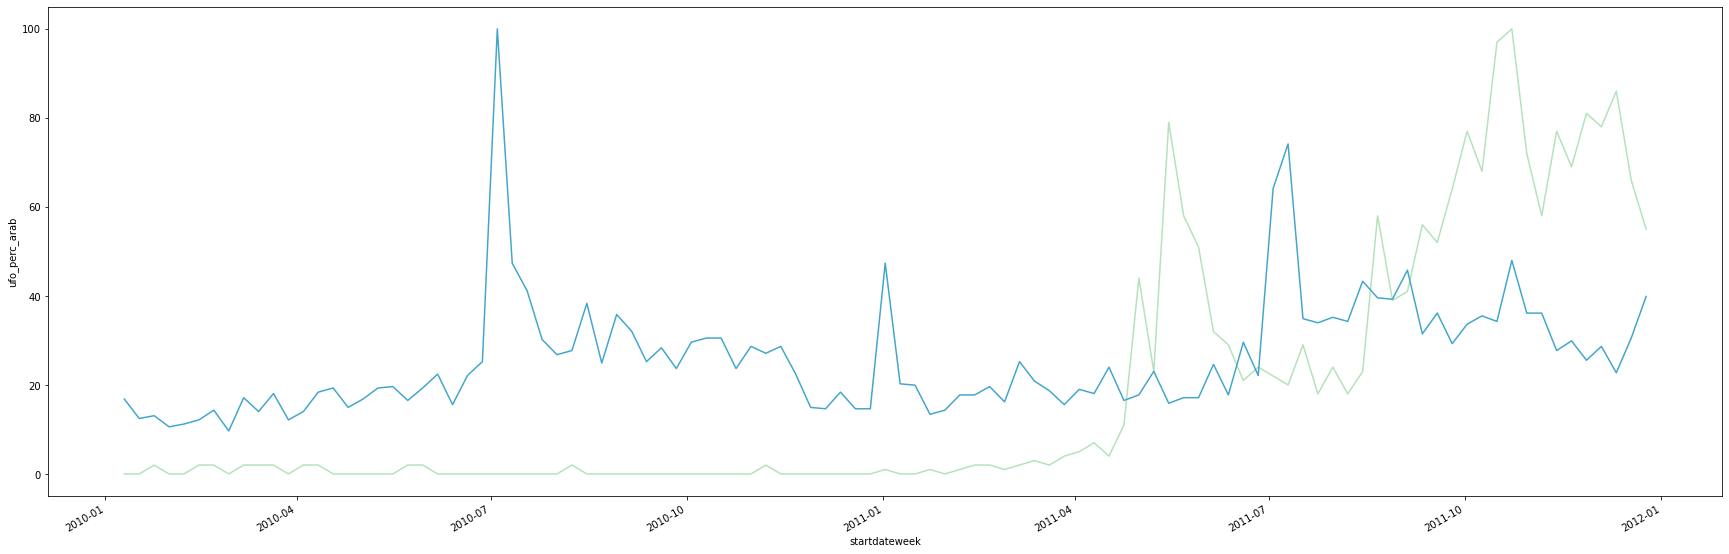

In [28]:
# plotting ufos in blue and arab spring  data in green
fig, ax = plt.subplots( figsize = (30, 10))
fig.autofmt_xdate()
ax1 = sns.lineplot( x = combined4['startdateweek'], y= combined4['rel_val'], color = palette1)
ax2 = sns.lineplot( x = combined4['startdateweek'], y= combined4['ufo_perc_arab'], color = palette2)

#### Plotting Kremlin data and ufos

In [29]:
kremlin = data.loc[data['topic'] == 'kremlin']

In [30]:
combined5 = pd.merge( ufos, kremlin, how = 'inner', on = 'week_id')

In [31]:
# adding column relative values ufocount for 2014
max_ufos_kremlin = combined5['weekly_ufocount'].max()
combined5 = combined5.assign(ufo_perc_kremlin = (combined5['weekly_ufocount'] / max_ufos_kremlin)*100)

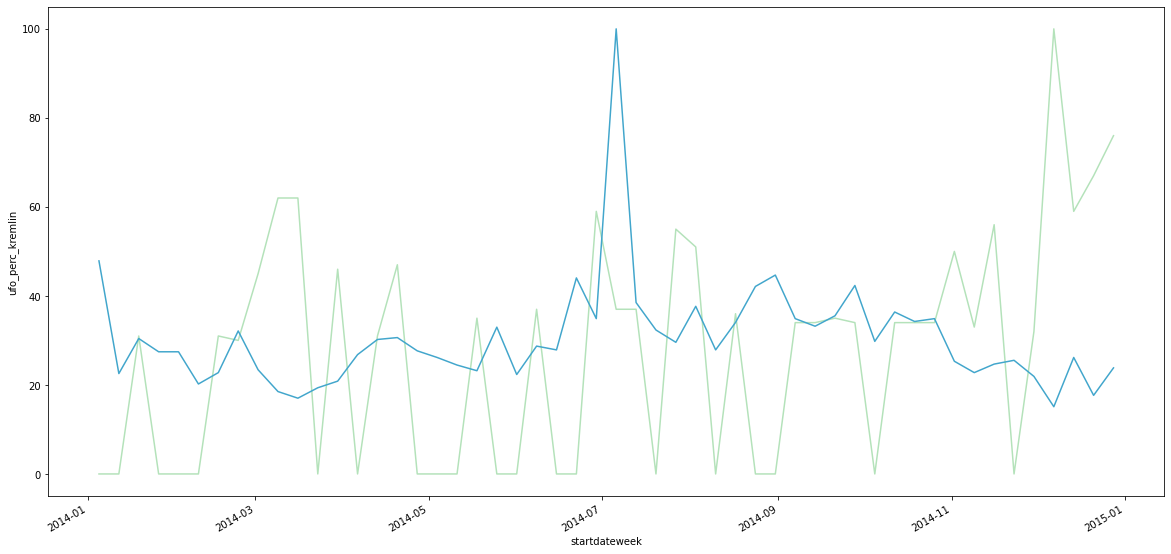

In [32]:
# plotting the ufos in blue and kremlin data in green
fig, ax = plt.subplots( figsize = (20, 10))
fig.autofmt_xdate()

ax1 = sns.lineplot( x = combined5['startdateweek'], y= combined5['rel_val'], color= palette1)
ax2 = sns.lineplot( x = combined5['startdateweek'], y = combined5['ufo_perc_kremlin'], color = palette2)

## 